Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("AgriRiskFin_Dataset.csv")

First step of EDA, we want to look for:
- shape of the dataset, number of columns/lines etc
- types of variables (numerical, categorical)
- patterns
- if the variables are coherent

In [3]:
df.head()

,Enterprise_ID,Region,Enterprise_Size,Revenue,Expenses,Loan_Amount,Debt_to_Equity,Avg_Temperature,Rainfall,Drought_Index,Flood_Risk_Score,Commodity_Price_Index,Input_Cost_Index,Policy_Support_Score,Quarter,Net_Profit,Financial_Risk_Level
0,ENT0001,East,Large,511.04,620.91,96.82,0.73,40.2,128.1,0.84,0.78,141.44,58.87,4,Q4,-109.87,Medium
1,ENT0002,West,Small,479.35,428.89,239.25,1.26,23.6,256.6,0.42,0.84,95.88,44.67,8,Q1,50.46,High
2,ENT0003,North,Medium,277.55,450.88,101.68,0.53,21.2,185.9,0.83,0.86,125.52,56.30,6,Q3,-173.33,Medium
3,ENT0004,East,Large,516.86,145.10,76.83,1.41,24.3,77.8,0.93,0.48,88.41,61.58,6,Q2,371.76,High
4,ENT0005,East,Large,402.45,425.76,66.73,1.61,18.4,112.1,0.02,0.40,79.60,42.32,6,Q2,-23.31,Medium


In [5]:
df.shape

(4981, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Enterprise_ID          4981 non-null   object 
 1   Region                 4981 non-null   object 
 2   Enterprise_Size        4981 non-null   object 
 3   Revenue                4981 non-null   float64
 4   Expenses               4981 non-null   float64
 5   Loan_Amount            4981 non-null   float64
 6   Debt_to_Equity         4981 non-null   float64
 7   Avg_Temperature        4981 non-null   float64
 8   Rainfall               4981 non-null   float64
 9   Drought_Index          4981 non-null   float64
 10  Flood_Risk_Score       4981 non-null   float64
 11  Commodity_Price_Index  4981 non-null   float64
 12  Input_Cost_Index       4981 non-null   float64
 13  Policy_Support_Score   4981 non-null   int64  
 14  Quarter                4981 non-null   object 
 15  Net_

In [8]:
df.describe()

,Revenue,Expenses,Loan_Amount,Debt_to_Equity,Avg_Temperature,Rainfall,Drought_Index,Flood_Risk_Score,Commodity_Price_Index,Input_Cost_Index,Policy_Support_Score,Net_Profit
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,500.355662,399.611753,149.483616,1.067332,25.995603,149.311604,0.503572,0.501905,100.205503,49.937810,5.042963,100.743909
std,149.096573,100.308679,86.918739,0.549754,4.988199,86.032235,0.291040,0.287375,20.128947,9.771272,3.206632,179.691576
min,-54.490000,63.470000,0.000000,0.100000,8.000000,0.100000,0.000000,0.000000,33.070000,13.250000,0.000000,-505.240000
25%,399.370000,331.300000,74.130000,0.600000,22.600000,77.000000,0.250000,0.250000,86.760000,43.310000,2.000000,-20.950000
50%,502.050000,399.090000,147.920000,1.080000,26.000000,148.100000,0.500000,0.500000,100.330000,49.990000,5.000000,103.020000
75%,601.340000,467.490000,225.360000,1.540000,29.400000,222.600000,0.760000,0.750000,113.980000,56.580000,8.000000,222.620000
max,1107.880000,741.860000,299.910000,2.000000,42.900000,300.000000,1.000000,1.000000,170.930000,83.630000,10.000000,781.850000


The dataset represents 4981 agricol entreprises and is composed of 17 variables covering both financial dimensions (revenues, expenses, loans, debt-to-equity), climatic (temperature, rainfall, drought, flood risk) as well as some market factors and political aspects

Good point: No missing values.

Types of variables:
- 11 float numeric variables
- 1 integer numeric variable (Policy_Support_Score)
- 5 categorical variables

First descriptives statistics shows a strong heterogeneity of financial performances, with a big variance in the net profit: from -505 to +781, reflecting economical situasionships depending to the entreprise. Climate variables also show a certain variability, which is consistent with different geographical areas.

We will verify to be sure there is not any missing value

<Axes: >

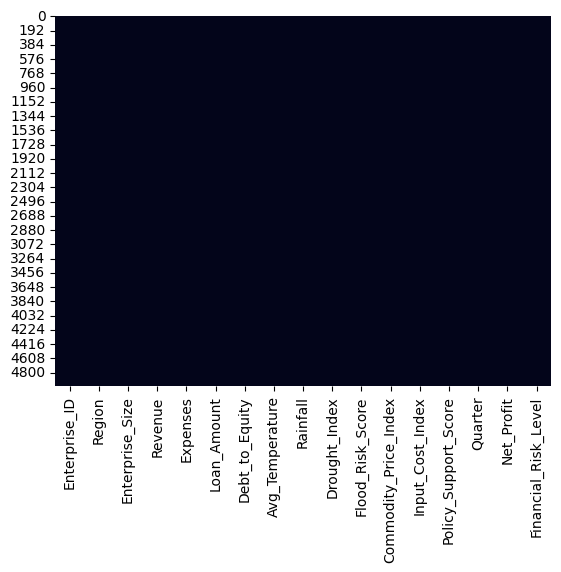

In [10]:
df.isna().sum()
sns.heatmap(df.isna(), cbar=False)


Conclusion: The dataset contains no missing values across all 4981 observations and 17 variables.


We are now going to verify if there is duplicates and drop them if there is

In [11]:
df.duplicated().sum()
df = df.drop_duplicates()

We are now going to do a column by column analyse.

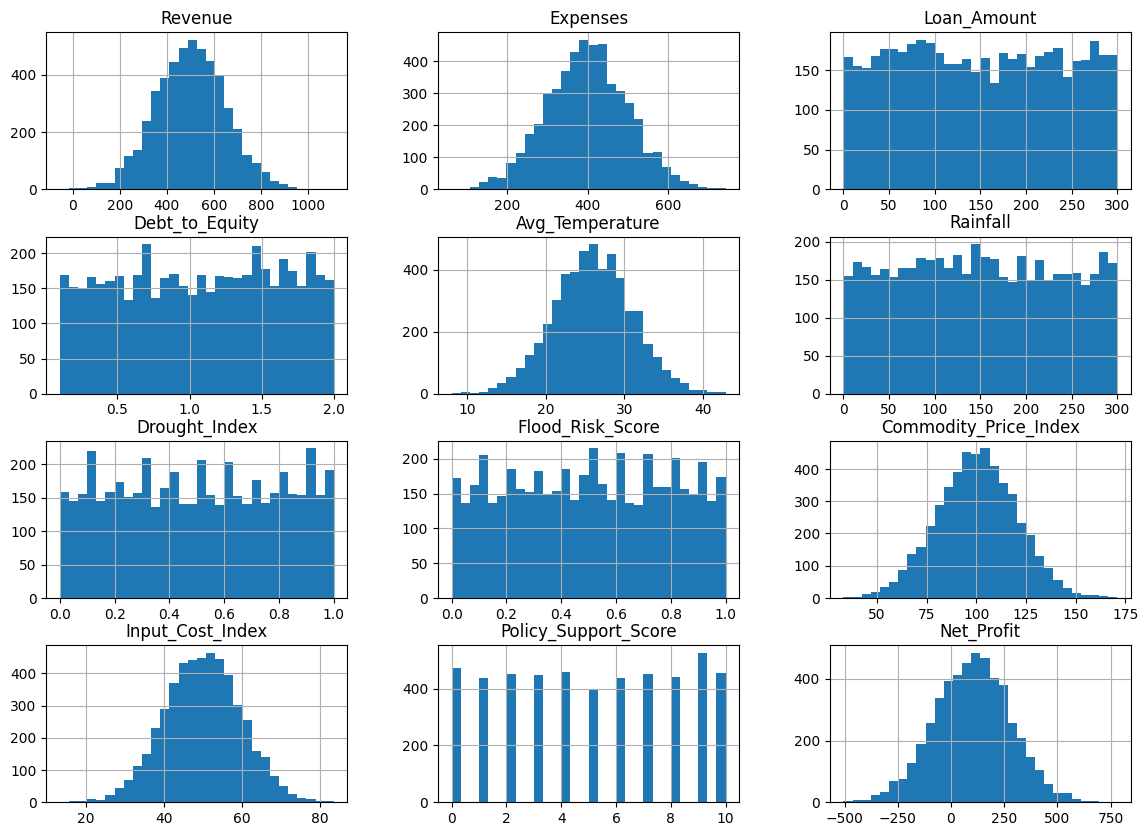

<Axes: >

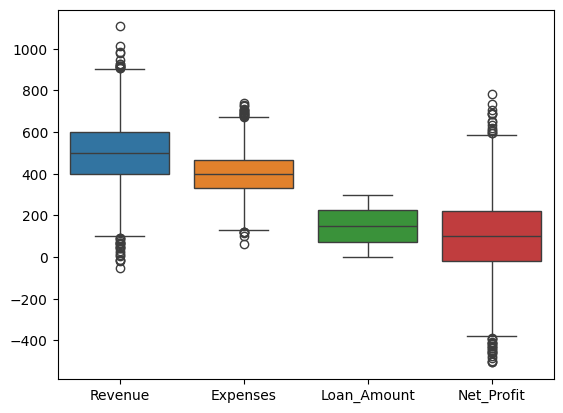

In [ ]:
df.hist(bins=30, figsize=(14,10)) #categoric
plt.show()

sns.boxplot(data=df[['Revenue','Expenses','Loan_Amount','Net_Profit']])

<Axes: xlabel='Region', ylabel='count'>

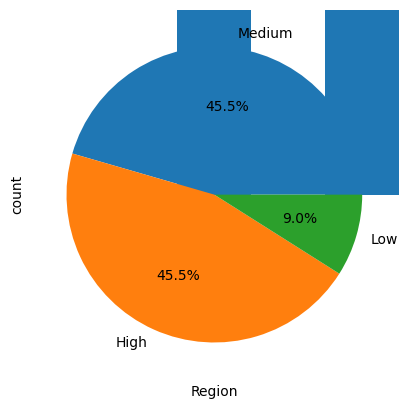

In [ ]:
df['Region'].value_counts().plot(kind='bar') #numeric
df['Financial_Risk_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')

All good: analyse will in the report

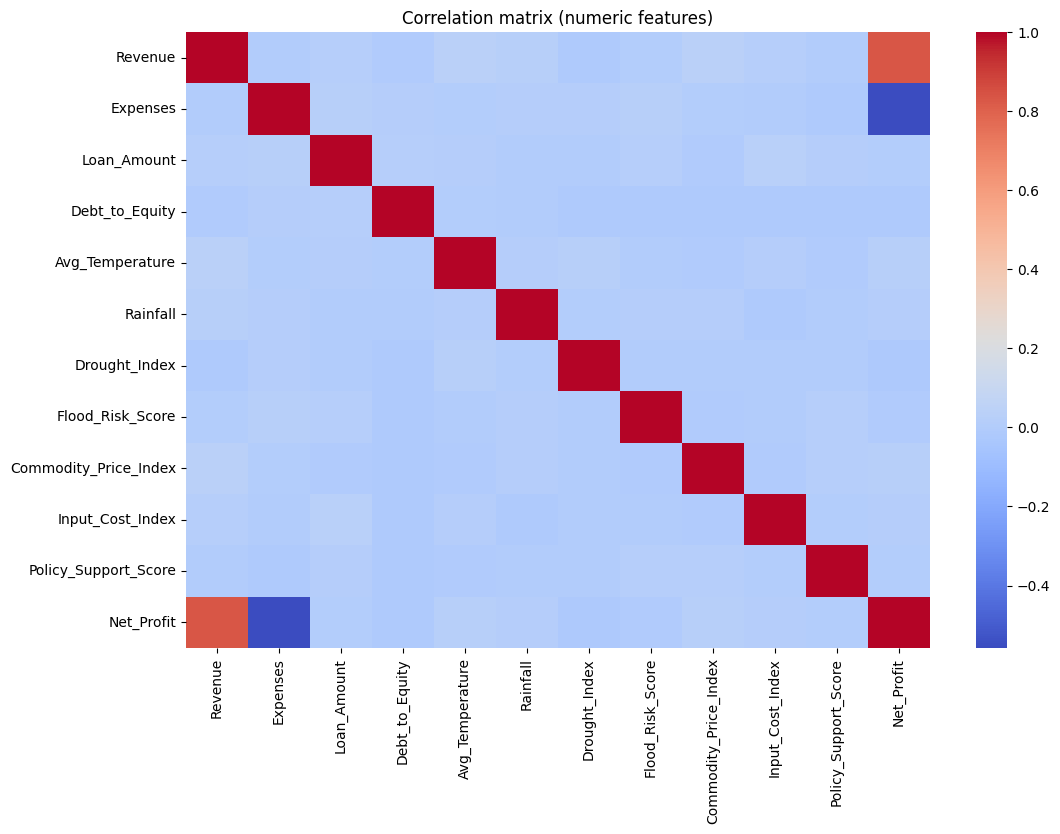

In [17]:
#multivaried analysis
num_df = df.select_dtypes(include=['float64', 'int64']) #we only took numerical values

plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation matrix (numeric features)")
plt.show()


Great news for our model because low linear correlations suggest that climate impacts may involve non-linear or interaction effects that cannot be captured by a simple linear model -> A deeper modeling approach (ML classification/regression + scenario simulation) is required to uncover hidden patterns.

<Axes: xlabel='Avg_Temperature', ylabel='Net_Profit'>

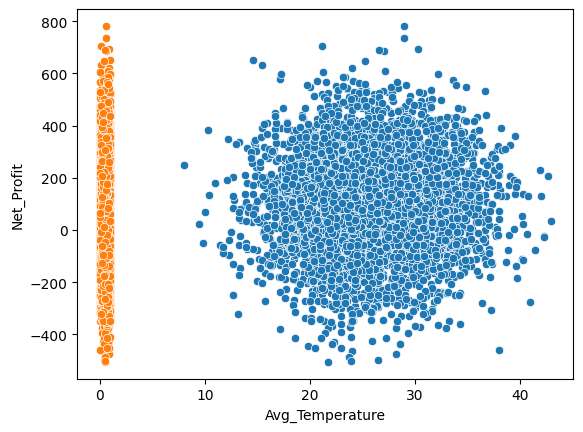

In [ ]:
sns.scatterplot(x="Avg_Temperature", y="Net_Profit", data=df)
sns.scatterplot(x="Drought_Index", y="Net_Profit", data=df)

There is no discernible linear trend in the scatterplot of average temperature and net profit, which displays a completely dispersed cloud of points.
 The correlation matrix's weak correlation (≈ 0.02) is visually confirmed by this.
 Profit fluctuations cannot be directly explained by temperature alone, indicating that climate impacts may function through more intricate, non-linear mechanisms or interactions with other variables.

<Axes: xlabel='Net_Profit'>

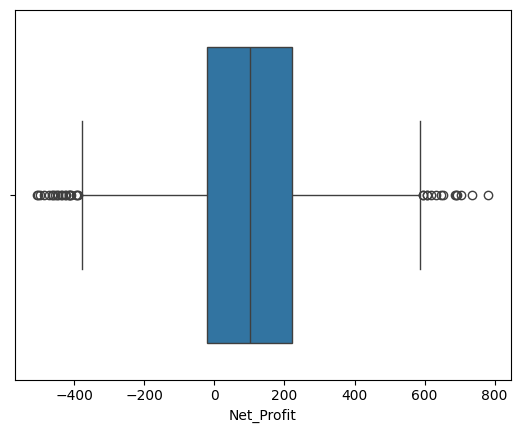

In [19]:
#outliers
sns.boxplot(x=df["Net_Profit"])

Probably :
des années catastrophiques (sécheresse, inondation, prix bas)
des années exceptionnelles (prix élevés, rendement fort)
des entreprises très petites ou très grandes

It doesn't destroy our analyse

Best solution : scaler les variables to handle outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Revenue','Expenses','Loan_Amount','Net_Profit']])


In [25]:
df['Profit_Margin'] = df['Net_Profit'] / df['Revenue']
df['Cost_Ratio'] = df['Expenses'] / df['Revenue']
df['Debt_Ratio'] = df['Loan_Amount'] / df['Revenue']

df['Climate_Stress'] = (
    df['Drought_Index'] * 0.4 +
    df['Flood_Risk_Score'] * 0.4 +
    (df['Avg_Temperature'] - df['Avg_Temperature'].mean()) / df['Avg_Temperature'].std() * 0.2
)

In [ ]:
# 1. Remove Entreprise_ID -> doesn't matter
if "Enterprise_ID" in df.columns:
    df = df.drop("Enterprise_ID", axis=1)

# 2. One-hot encoding for categorical variables
categorical_cols = ['Region', 'Enterprise_Size', 'Quarter']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Separate features and target
y = df['Financial_Risk_Level']
X = df.drop('Financial_Risk_Level', axis=1)

# 4. Scaling numeric features
from sklearn.preprocessing import StandardScaler
num_cols = X.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Final cleaned dataset
X_cleaned = X
y_cleaned = y


KeyError: "None of [Index(['Region', 'Enterprise_Size', 'Quarter'], dtype='object')] are in the [columns]"

Create some features to help the model to run better

In [23]:
df_cleaned = pd.concat([X_cleaned, y_cleaned], axis=1)
df_cleaned.to_csv("data_cleaned.csv", index=False)